### Testing for OpenAI Gym Environment

In [22]:
import gym
import copy

env = gym.make('CartPole-v0')
for i_episode in range(5):
    observation = env.reset()
    print(observation)
    for t in range(100):
        ren = env.render()
        action = env.action_space.sample()
        next_observation, reward, done, info = env.step(action)
        
        if done:
            print('ob:{}, next_ob:{}, reward:{}'.format(observation,next_observation,reward))
            print("Episode finished after {} timesteps".format(t+1))
            break
        observation = copy.copy(next_observation)

env.close()

[-0.02132805 -0.02181935 -0.04811757  0.04917312]
ob:[ 0.06483439  0.76980627 -0.19069851 -1.38911335], next_ob:[ 0.08023052  0.57750209 -0.21848078 -1.16161236], reward:1.0
Episode finished after 11 timesteps
[0.04778069 0.04908237 0.0201432  0.01681026]
ob:[0.06020735 0.01145122 0.20241192 0.86313094], next_ob:[0.06043637 0.20332764 0.21967454 0.64029575], reward:1.0
Episode finished after 29 timesteps
[0.02633773 0.0158568  0.03678764 0.04722235]
ob:[ 0.01741107 -0.2058907   0.20838537  0.94583259], next_ob:[ 0.01329325 -0.40311722  0.22730202  1.2960951 ], reward:1.0
Episode finished after 28 timesteps
[ 0.03252175  0.00687352 -0.02535933  0.04228132]
ob:[ 0.13069194  0.99418757 -0.18459691 -1.70340452], next_ob:[ 0.15057569  0.80160842 -0.218665   -1.47340737], reward:1.0
Episode finished after 22 timesteps
[ 0.03053348 -0.02448834 -0.04858908  0.02528341]
ob:[-0.10606739  0.33115565  0.20673737  0.20729255], next_ob:[-0.09944428  0.1337697   0.21088322  0.55741547], reward:1.0
Ep

In [6]:
ren

True

In [8]:
import gym
env = gym.make('CartPole-v0')

In [14]:
env = gym.make('CartPole-v0')   # 定义使用 gym 库中的那一个环境
env = env.unwrapped # 不做这个会有很多限制

print(env.action_space) # 查看这个环境中可用的 action 有多少个
print(env.observation_space)    # 查看这个环境中可用的 state 的 observation 有多少个
print(env.observation_space.high)   # 查看 observation 最高取值
print(env.observation_space.low)    # 查看 observation 最低取值

Discrete(2)
Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [24]:
env.close()

### input extraction

In [19]:
import gym
import copy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import numpy as np
from PIL import Image

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


env = gym.make('Acrobot-v1')
print(env.action_space) # 查看这个环境中可用的 action 有多少个
print(env.observation_space)    # 查看这个环境中可用的 state 的 observation 有多少个
print(env.observation_space.high)   # 查看 observation 最高取值
print(env.observation_space.low)    # 查看 observation 最低取值

Discrete(3)
Box(6,)
[ 1.        1.        1.        1.       12.566371 28.274334]
[ -1.        -1.        -1.        -1.       -12.566371 -28.274334]


In [32]:
resize = T.Compose([T.ToPILImage(),
                    T.Resize(84, interpolation=Image.CUBIC),
                    T.Grayscale(num_output_channels=1),
                    T.ToTensor()])

def get_screen():
    '''
    return a resized screen (tensor) in (BCHW)
    '''
    # Returned screen is size (1000,1000,3), need to transpose to 
    # torch order (CHW)
    screen = env.render(mode='rgb_array').transpose((2,0,1))
    # print(type(screen), screen.shape)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    
    # Resize, and add a batch dimension (BCHW)
    screen = resize(screen).unsqueeze(0).to(device)
    print(type(screen), screen.shape)
    return screen
    
    
def show_screen(screen):
    plt.figure()
    plt.imshow(screen.cpu().squeeze(0).squeeze(0).numpy(),
               interpolation='none')
    plt.title('Example extracted screen')
    plt.show()
    
    
env.reset()
screen1 = get_screen()

for i in range(1):
    action = env.action_space.sample()
    _,_,_,_ = env.step(action)
screen2 = get_screen()
env.close()

<class 'torch.Tensor'> torch.Size([1, 1, 84, 84])
<class 'torch.Tensor'> torch.Size([1, 1, 84, 84])


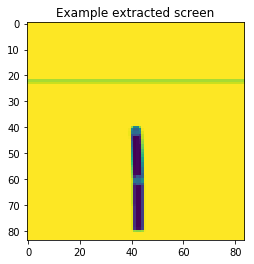

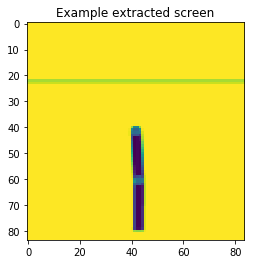

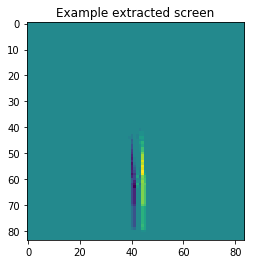

In [33]:
env.reset()

show_screen(screen1)
show_screen(screen2)

diff = screen1 - screen2

show_screen(diff)


env.close()

In [15]:
# Returned screen requested by gym is 400x600x3, but is sometimes larger
# such as 800x1200x3. Transpose it into torch order (CHW).
env.reset()
for i_episode in range(1):
    env.reset()
    
    for t in range(500):
        ren = env.render()
        action = env.action_space.sample()
        next_observation, reward, done, info = env.step(action)

        if done:
            print('ob:{}, next_ob:{}, reward:{}'.format(observation,next_observation,reward))
            print("Episode finished after {} timesteps".format(t+1))
            break
        observation = copy.copy(next_observation)

env.close()

ob:[ 0.75261216 -0.65846407  0.94468548  0.32797767  1.34220201 -3.23489943], next_ob:[ 0.92546345 -0.3788369   0.94068068 -0.33929317  1.86625067 -3.37856031], reward:-1.0
Episode finished after 500 timesteps


### ReplayMemory